# Turner's ERDDAP tutorial with erddap-python
Using documentation from https://github.com/hmedrano/erddap-python

In [1]:
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt

# in terminal/console: conda install -c conda-forge erddap-python

from matplotlib import pyplot as plt 
import seaborn as sns

On an ERDDAP server data can be stored in the form of TableDAP or GridDAP.

From OOI erddap index page:

"Tabledap lets you use the OPeNDAP hyperslab (constraint/selection) protocol to request data subsets, graphs, and maps from tabular datasets (for example, buoy data).

Griddap lets you use the OPeNDAP hyperslab protocol to request data subsets, graphs, and maps from gridded datasets (for example, satellite data and climate model data)."

All data on the OOI ERDDAP server is in TableDAP format.

### Tabledap: 
- ERDDAP_Tabledap takes args for server url and dataset ID (found on server website page for dataset)
- retrieves object of class ERDDAP_Tabledap, which contains all info on dataset
- notably lists all data as 'Variables', as opposed to Griddap's 'Variables and Dimensions'



In [2]:
from erddapClient import ERDDAP_Tabledap 

remote_td = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
print("Datatype: ",type(remote_td))
print(remote_td)

Datatype:  <class 'erddapClient.erddap_tabledap.ERDDAP_Tabledap'>
<erddapClient.ERDDAP_Tabledap>
Title:       Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring: Surface Piercing Profiler: Spectral Irradiance
Server URL:  http://erddap.dataexplorer.oceanobservatories.org/erddap
Dataset ID:  ooi-ce01issp-sp001-07-spkirj000
Variables: 
  time (double) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  latitude (double) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (double) 
    Standard name: longitude 
    Units:         degrees_east 
  z (double) 
    Standard name: altitude 
    Units:         m 
  spectir_412nm (double) 
    Standard name: spectir 
    Units:         microW.cm-2.nm-1 
  spectir_412nm_qc_agg (int) 
    Standard name: aggregate_quality_flag 
  spectir_412nm_qc_tests (int) 
    Standard name: spectir quality_flag 
  spectir_443nm (double) 
    Standard name: spectir 
    Units:         microW

This package has the capability of building data request URLs, the main way of tunneling into ERDDAP servers and retrieving data. This URL changes with requested variables, datatype (e.g. csv, html, netcdf), and several other constraints.

Most of the time URL generation is not necessary, between erddap-python's ability to tunnel into ERDDAP servers without the user inputting a URL (rather inputting the components which build the URL), and a URL-building feature being available on ERDDAP server's dataset websites.

In [3]:
remote_td.setResultVariables(['time','z'])
remote_td.getURL('htmlTable')

'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.htmlTable?time%2Cz'

From an object of ERDDAP_Tabledap class we can request subset of its by setting object properties (.setResultVariable), adding variable constraints (.addConstraint), and/or setting datatype (.getData or .getDataFrame (pandas)).

Variables of interest for this surface-piercing profiler set are: time, z, and a slew of irradiance at different wavelengths (spectir_412nm (violet), spectir_443nm (blue), spectir_490nm (cyan), spectir_510nm (green), spectir_555nm (yellow-green), spectir_620nm (orange), spectir_683nm (red)). 

Color approximations from https://pages.cs.wisc.edu/~yetkin/code/wavelength_to_rgb/wavelength.html.

In [4]:
remote_td.clearQuery()
responseDf = (
    remote_td.setResultVariables(['time','z','spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm', 'spectir_683nm'])
            .getDataFrame()
    )
responseDf

,time (UTC),z (m),spectir_412nm (microW.cm-2.nm-1),spectir_443nm (microW.cm-2.nm-1),spectir_490nm (microW.cm-2.nm-1),spectir_510nm (microW.cm-2.nm-1),spectir_555nm (microW.cm-2.nm-1),spectir_620nm (microW.cm-2.nm-1),spectir_683nm (microW.cm-2.nm-1)
0,2014-04-17T22:28:00Z,-20.0,0.030614,0.023073,0.139625,0.220813,0.442157,-0.002197,0.005706
1,2014-04-17T22:28:00Z,-19.0,0.037231,0.030066,0.171555,0.269376,0.528362,-0.000152,0.006310
2,2014-04-17T22:28:00Z,-18.0,0.048694,0.042189,0.218303,0.344181,0.669369,0.004723,0.007052
3,2014-04-17T22:28:00Z,-17.0,0.057129,0.050411,0.250974,0.395703,0.766718,0.007724,0.007074
4,2014-04-17T22:28:00Z,-16.0,0.065813,0.059395,0.283560,0.446932,0.865479,0.013464,0.007337
...,...,...,...,...,...,...,...,...,...
49938,2022-09-27T07:53:00Z,-5.0,0.010989,-0.002785,0.010997,0.007728,-0.006375,-0.005846,0.008078
49939,2022-09-27T07:53:00Z,-4.0,0.010630,-0.002738,0.010916,0.007805,-0.006242,-0.005502,0.007749
49940,2022-09-27T07:53:00Z,-3.0,0.010466,-0.002522,0.010447,0.007654,-0.007148,-0.005562,0.007265
49941,2022-09-27T07:53:00Z,-2.0,0.010201,-0.002446,0.010259,0.007780,-0.006556,-0.005270,0.006446


This dataframe can now be treated as any pandas dataframe.

It is not useful to us to have the units in the column headers so we are going to get rid of everything after a space in all column names:

In [5]:
responseDf.columns = responseDf.columns.str.split(' ').str[0]
responseDf.columns

Index(['time', 'z', 'spectir_412nm', 'spectir_443nm', 'spectir_490nm',
       'spectir_510nm', 'spectir_555nm', 'spectir_620nm', 'spectir_683nm'],
      dtype='object')

Before plotting the data, I'll define a palette that represents the wavelengths being measured (including different versions for use in plotting).

In [6]:
#           purple     blue        cyan       green    chartreuse  orange     red
#            412       443         490         510        555       620        683
colors = ["#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal = sns.color_palette(colors)


#               black    purple     blue        cyan       green    chartreuse  orange     red
#                         412       443         490         510        555       620        683
colors_black = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal_black = sns.color_palette(colors_black)


colors_r = ["#ff0000", "#ff7700", "#b3ff00", "#00ff00", "#00ffff", "#001bff", "#7b00e2"]
pal_r = sns.color_palette(colors_r)

pal

[(0.4823529411764706, 0.0, 0.8862745098039215),
 (0.0, 0.10588235294117647, 1.0),
 (0.0, 1.0, 1.0),
 (0.0, 1.0, 0.0),
 (0.7019607843137254, 1.0, 0.0),
 (1.0, 0.4666666666666667, 0.0),
 (1.0, 0.0, 0.0)]

# Summary plot of Irrandiance by Index

Text(0, 0.5, 'spectral irradiance (microW.cm^2.nm^-1)')

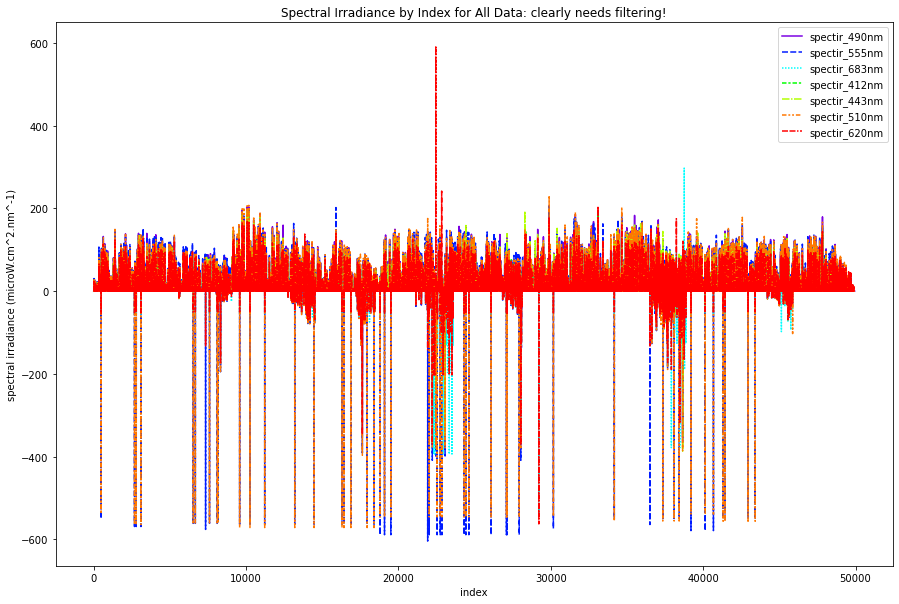

In [7]:
fig, ax = plt.subplots(figsize=(15,10))

#subselecting columns to plot becuase we don't want to plot z on the same y-axis as irradiance.
sns.lineplot(data=responseDf[{"spectir_412nm","spectir_443nm","spectir_490nm","spectir_510nm","spectir_555nm","spectir_620nm","spectir_683nm"}],palette = pal)
plt.legend(facecolor='white')
plt.title("Spectral Irradiance by Index for All Data: clearly needs filtering!")
plt.xlabel("index")
plt.ylabel("spectral irradiance (microW.cm^2.nm^-1)")

This summary of the data is only really useful in demonstrating the outlier errors, which in this case are extreme. The same is possible for looking at depth data from a macro view:

# Summary plot of Depth by Index

Text(0, 0.5, 'depth (m)')

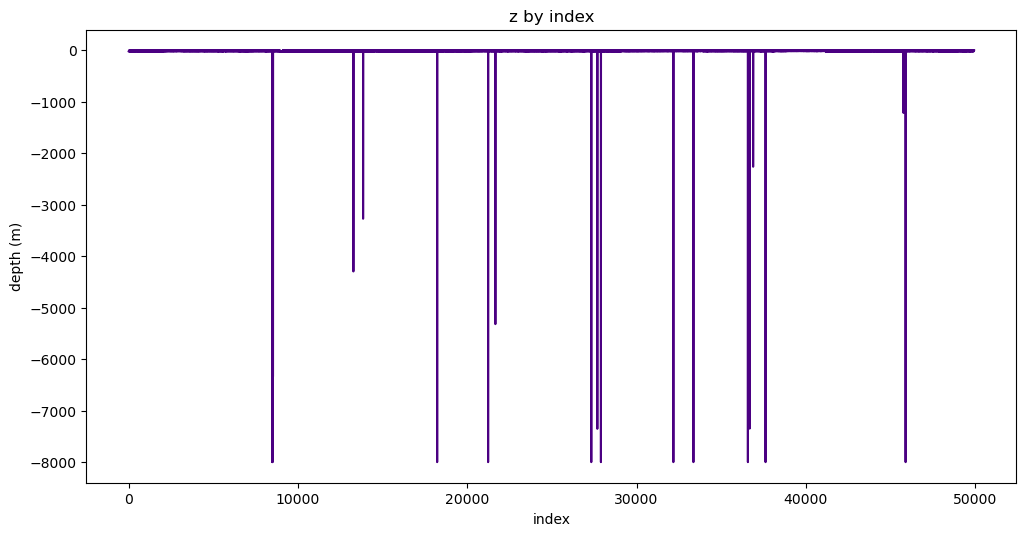

In [8]:
plt.figure(figsize=(12,6), dpi=100)
responseDf['z'].plot(label='z (m)', color='indigo')
plt.title('z by index')
plt.xlabel("index")
plt.ylabel("depth (m)")

In order to look past the outliers and see what is really happening, we can reset the axes to shrink the view window. Now we can see the instrument's oscillations in depth.

(0.0, 3000.0)

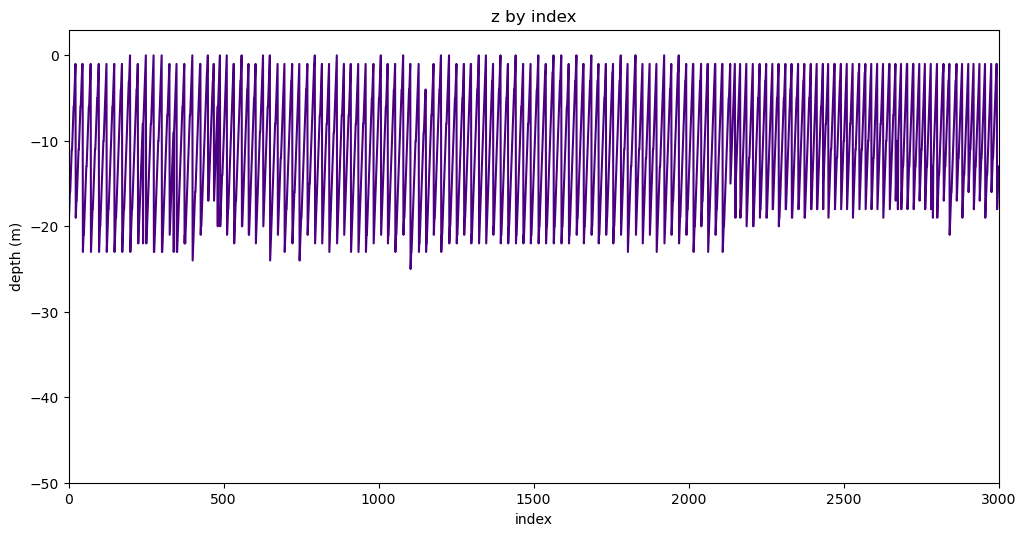

In [15]:
plt.figure(figsize=(12,6), dpi=100)
responseDf['z'].plot(label='z (m)', color='indigo')
plt.title('z by index')
plt.xlabel("index")
plt.ylabel("depth (m)")
plt.ylim((-50,3))
plt.xlim((0,3000))

We can zoom in further and see that the profiler takes data on its upward trajectory. There remain some visibly erroneous data at this scale. Also note that on many passes, the profiler never reaches the surface, stopping right underneath before descending again.

(0.0, 300.0)

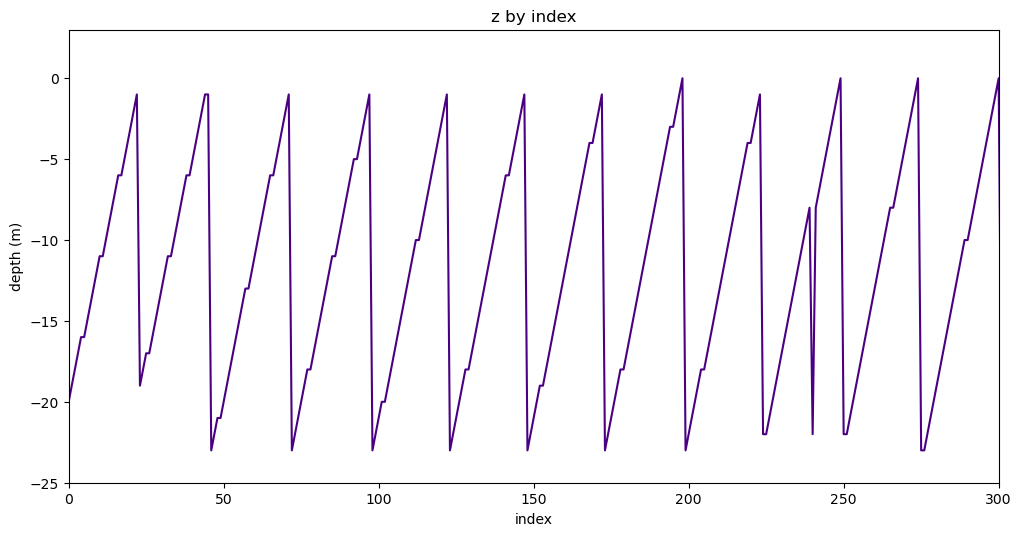

In [18]:
plt.figure(figsize=(12,6), dpi=100)
responseDf['z'].plot(label='z (m)', color='indigo')
plt.title('z by index')
plt.xlabel("index")
plt.ylabel("depth (m)")
plt.ylim((-25,3))
plt.xlim((0,300))

We can explore these outlier values to get a sense of their proportion. All of these look erroneous except for depth, which could max at 0.

In [25]:
print("dataset spectir min is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].min(axis=1).min())
print("dataset spectir max is: ",responseDf[['spectir_412nm','spectir_443nm','spectir_490nm','spectir_510nm','spectir_555nm','spectir_620nm','spectir_683nm']].max(axis=1).max())

print("z min is: ",responseDf[['z']].min(axis=1).min())
print("z max is: ",responseDf[['z']].min(axis=1).max())

dataset spectir min is:  -603.989492929
dataset spectir max is:  590.3492490098
z min is:  -8000.0
z max is:  0.0


Let's manually index one pass of data. I'm choosing the third spike on the z by index plot above, which looks to be between an index of 40 and 80.

In [9]:
one_pass = responseDf[40:80]
one_pass

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
40,2014-04-17T22:40:00Z,-5.0,4.297718,4.398644,7.779236,8.927092,11.241359,3.330601,1.012523
41,2014-04-17T22:40:00Z,-4.0,6.264999,6.434788,10.252430,11.292836,13.509869,5.043553,1.912849
42,2014-04-17T22:40:00Z,-3.0,9.265276,9.544375,13.815251,14.665593,16.743874,7.753005,3.636733
43,2014-04-17T22:40:00Z,-2.0,14.402743,14.862667,19.188095,19.517857,21.106383,12.657952,7.717474
44,2014-04-17T22:40:00Z,-1.0,19.715962,20.400499,24.369860,24.087232,25.097047,17.903738,13.110827
45,2014-04-17T22:41:00Z,-1.0,22.940635,23.775769,27.575368,27.009266,27.772239,21.255158,16.792725
46,2014-04-17T22:48:00Z,-23.0,0.024901,0.018159,0.125063,0.198835,0.397833,-0.005235,0.006023
47,2014-04-17T22:48:00Z,-22.0,0.027285,0.020323,0.137052,0.219910,0.442440,-0.004652,0.006018
48,2014-04-17T22:48:00Z,-21.0,0.033615,0.027464,0.175072,0.283286,0.565874,-0.001811,0.005810
49,2014-04-17T22:49:00Z,-21.0,0.032297,0.027380,0.174641,0.288131,0.587269,-0.002576,0.006009


We can see the indices at which z changes discontinuously. This is where we will set the bounds of our one_pass dataframe.

In [10]:
one_pass = responseDf[46:72]
one_pass

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm,spectir_620nm,spectir_683nm
46,2014-04-17T22:48:00Z,-23.0,0.024901,0.018159,0.125063,0.198835,0.397833,-0.005235,0.006023
47,2014-04-17T22:48:00Z,-22.0,0.027285,0.020323,0.137052,0.219910,0.442440,-0.004652,0.006018
48,2014-04-17T22:48:00Z,-21.0,0.033615,0.027464,0.175072,0.283286,0.565874,-0.001811,0.005810
49,2014-04-17T22:49:00Z,-21.0,0.032297,0.027380,0.174641,0.288131,0.587269,-0.002576,0.006009
50,2014-04-17T22:49:00Z,-20.0,0.039735,0.034329,0.209401,0.340439,0.680516,0.000049,0.006437
51,2014-04-17T22:49:00Z,-19.0,0.050739,0.046080,0.265911,0.431867,0.857284,0.005297,0.006301
52,2014-04-17T22:49:00Z,-18.0,0.066144,0.062507,0.336180,0.541895,1.061448,0.011327,0.007218
53,2014-04-17T22:49:00Z,-17.0,0.076920,0.073600,0.375999,0.602366,1.175055,0.017629,0.008204
54,2014-04-17T22:49:00Z,-16.0,0.094308,0.091596,0.438619,0.697635,1.348592,0.027623,0.009242
55,2014-04-17T22:49:00Z,-15.0,0.127796,0.124599,0.550029,0.861159,1.630086,0.045935,0.010875


Now we can look at this profile more closely:

Text(47, 15, 'Note: max irradiance in the λ=555nm at all depths')

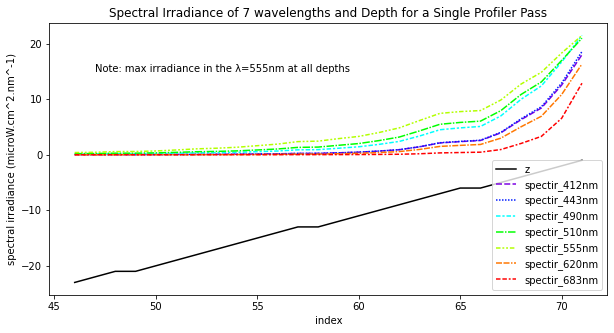

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=one_pass,palette = pal_black)
#because z is only negative and spectir values are only positive, and both variances are similar 
#this plot is functionally faceted while in reality these values are being plotted on the same axes.
ax.set_title("Spectral Irradiance of 7 wavelengths and Depth for a Single Profiler Pass")
ax.set_xlabel("index")
ax.set_ylabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.text(47, 15, 'Note: max irradiance in the λ=555nm at all depths')

For the type of data summary plot I want, we need to reshape the datatable. This makes facet wrapping easier in plotting. See the many types of ways to do this at: https://pandas.pydata.org/docs/user_guide/reshaping.html.

I'm using pandas melt() to shift the spectir column names into values for a new variable column called "wavelength," and store their associated values in a different data column called "spectir".

In [32]:
variables_to_pivot = one_pass.columns.tolist()[2:]
one_pass_pivoted = pd.melt(one_pass, id_vars=['time', 'z'], value_vars= variables_to_pivot,var_name='wavelength', 
                           value_name='spectir')
one_pass_pivoted

,time,z,wavelength,spectir
0,2014-04-17T22:48:00Z,-23.0,spectir_412nm,0.024901
1,2014-04-17T22:48:00Z,-22.0,spectir_412nm,0.027285
2,2014-04-17T22:48:00Z,-21.0,spectir_412nm,0.033615
3,2014-04-17T22:49:00Z,-21.0,spectir_412nm,0.032297
4,2014-04-17T22:49:00Z,-20.0,spectir_412nm,0.039735
...,...,...,...,...
177,2014-04-17T22:51:00Z,-5.0,spectir_683nm,0.935313
178,2014-04-17T22:51:00Z,-4.0,spectir_683nm,2.033363
179,2014-04-17T22:51:00Z,-3.0,spectir_683nm,3.307146
180,2014-04-17T22:51:00Z,-2.0,spectir_683nm,6.565675


NameError: name 'label' is not defined

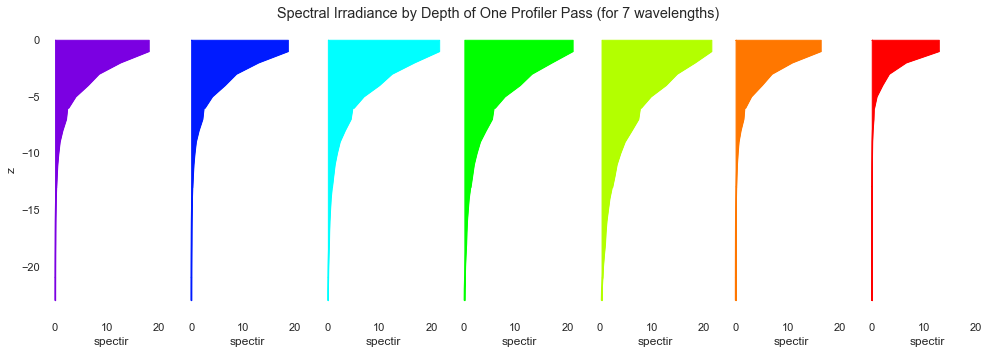

In [50]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(one_pass_pivoted, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5)
g.map(sns.lineplot, "spectir", "z")
g.map(plt.fill_between, "spectir","z")
g.fig.suptitle('Spectral Irradiance by Depth of One Profiler Pass (for 7 wavelengths)')
g.set_titles("")
#g.set(xticks=[], xlabel="", ylabel="depth (m)")
g.despine(bottom=True, left=True)
g.map(label, "spectir") #throwing an error in this nb but not in my other one. #this line labels each wavelength.

Notice there's a weird artefact where the fill_betweet plot falsely represents the data as going to z=0, where it really goes just to z=-1. This can also be (better?) represented using sns.lineplot.

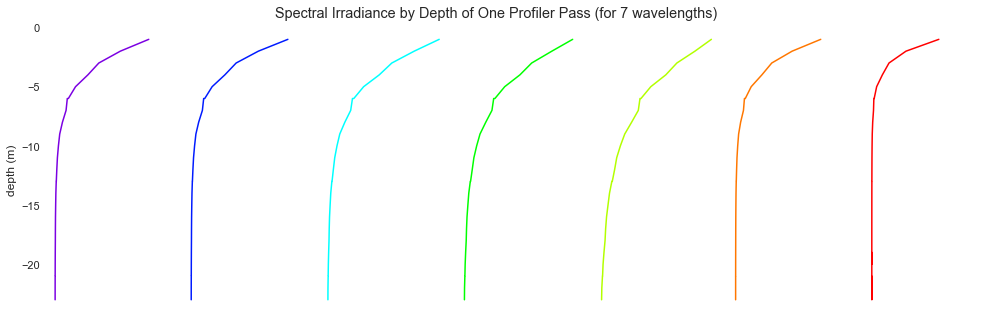

In [47]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(one_pass_pivoted, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5) #
g.map(sns.lineplot, "spectir", "z")
g.fig.suptitle('Spectral Irradiance by Depth of One Profiler Pass (for 7 wavelengths) ')
g.set_titles("")
g.set(ylabel="depth (m)")
g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
#g.map(label, "spectir")

In [49]:
plt.clf()

<Figure size 432x288 with 0 Axes>